<a href="https://colab.research.google.com/github/BrandonKTC/Statistic_python/blob/main/Matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
# install Librairies
!pip install CausalInference

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [85]:
%cd /content/drive/MyDrive/Business Analyst course/Econometrics and Causal Inference/Matching

/content/drive/MyDrive/Business Analyst course/Econometrics and Causal Inference/Matching


In [86]:
# libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss
from causalinference import CausalModel

In [87]:
# Data
df = pd.read_csv('school.csv')
df = df.iloc[:, 1:]
df.head()

,catholic,race,number_places_lived,mom_age,dad_age,dad_education,mom_education,mom_score,dad_score,income,poverty,food_stamps,score_standardized
0,0,"WHITE, NON-HISPANIC",1,47,45,DOCTORATE OR PROFESSIONAL DEGREE,SOME COLLEGE,53.50,77.5,62500.5,0,0,0.981753
1,0,"WHITE, NON-HISPANIC",1,41,48,BACHELOR'S DEGREE,GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,34.95,53.5,45000.5,0,0,0.594378
2,0,"WHITE, NON-HISPANIC",1,43,55,"MASTER'S DEGREE (MA, MS)",GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,63.43,53.5,62500.5,0,0,0.490611
3,1,"WHITE, NON-HISPANIC",1,38,39,BACHELOR'S DEGREE,GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,53.50,53.5,87500.5,0,0,1.451278
4,0,"WHITE, NON-HISPANIC",1,47,57,DOCTORATE OR PROFESSIONAL DEGREE,"MASTER'S DEGREE (MA, MS)",61.56,77.5,150000.5,0,0,2.595699


# Data Analysis

In [88]:
# comparing group's averages
df.groupby("catholic").mean()

,number_places_lived,mom_age,dad_age,mom_score,dad_score,income,poverty,food_stamps,score_standardized
catholic,,,,,,,,,
0,1.106246,37.794621,40.134919,43.909495,42.590520,65393.928540,0.101578,0.045566,0.163128
1,1.073118,39.775269,42.007527,47.620871,45.908269,86180.625269,0.016129,0.006452,0.219685


In [89]:
# T-test
group1 = df.where(df.catholic == 0).dropna()["income"]
group2 = df.where(df.catholic == 1).dropna()["income"]

stat, p = ss.ttest_ind(group1, group2)

In [90]:
# what to loop
continuous = ["number_places_lived", "mom_age", "dad_age", "mom_score", "dad_score", "income"]

# where to store the results
stat = {}
p = {}

# loop
for x in continuous:
  group1 = df.where(df.catholic == 0).dropna()[x]
  group2 = df.where(df.catholic == 1).dropna()[x]

  stat[x], p[x] = ss.ttest_ind(group1, group2)
ttests = pd.DataFrame.from_dict(p, orient = "Index")
ttests.columns = ["pvalue"]
print(ttests)

                           pvalue
number_places_lived  7.072609e-03
mom_age              1.359492e-22
dad_age              3.344265e-16
mom_score            2.280116e-19
dad_score            5.489722e-18
income               5.943636e-41


In [91]:
# chi-square test
tab = pd.crosstab(df.poverty,
                  df.catholic)
stat, p, dof, exp = ss.chi2_contingency(tab)
print(p)

6.511354893726035e-17


In [92]:
# What to loop
categorical = ["poverty", "food_stamps"]

# where to store
stat = {}
p = {}
dof = {}
exp = {}

# loop
for x in categorical:
  tab = pd.crosstab(df[x],
                    df.catholic)
  stat[x], p[x], dof[x], exp[x] = ss.chi2_contingency(tab)

chisquare = pd.DataFrame.from_dict(p, orient="Index")
chisquare.columns = ["pvalue"]
print(chisquare)

                   pvalue
poverty      6.511355e-17
food_stamps  3.294153e-08


# Prepare Matching

In [93]:
#Temporary dataframe
temp = pd.get_dummies(df)
# check how many per race
df.race.value_counts()

WHITE, NON-HISPANIC                        3654
HISPANIC, RACE NOT SPECIFIED                408
HISPANIC, RACE SPECIFIED                    387
BLACK OR AFRICAN AMERICAN, NON-HISPANIC     357
ASIAN                                       342
MORE THAN ONE RACE, NON HISPANIC            123
NATIVE HAWAIIAN, OTHER PACIFIC ISLANDER      93
AMERICAN INDIAN OR ALASKA NATIVE             62
NOT ASCERTAINED                               3
Name: race, dtype: int64

In [94]:
# preparing race variable
df["race_asian"] = np.where(df.race == 'ASIAN', 1, 0)
df["race_white"] = np.where(df.race == 'WHITE, NON-HISPANIC', 1, 0)
df["race_black"] = np.where(df.race == 'BLACK OR AFRICAN AMERICAN, NON-HISPANIC', 1, 0)
df["race_hispanic"] = np.where((df.race == 'HISPANIC, RACE NOT SPECIFIED') | (df.race == 'ISPANIC, RACE SPECIFIED'), 1, 0)
df.head()

,catholic,race,number_places_lived,mom_age,dad_age,dad_education,mom_education,mom_score,dad_score,income,poverty,food_stamps,score_standardized,race_asian,race_white,race_black,race_hispanic
0,0,"WHITE, NON-HISPANIC",1,47,45,DOCTORATE OR PROFESSIONAL DEGREE,SOME COLLEGE,53.50,77.5,62500.5,0,0,0.981753,0,1,0,0
1,0,"WHITE, NON-HISPANIC",1,41,48,BACHELOR'S DEGREE,GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,34.95,53.5,45000.5,0,0,0.594378,0,1,0,0
2,0,"WHITE, NON-HISPANIC",1,43,55,"MASTER'S DEGREE (MA, MS)",GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,63.43,53.5,62500.5,0,0,0.490611,0,1,0,0
3,1,"WHITE, NON-HISPANIC",1,38,39,BACHELOR'S DEGREE,GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,53.50,53.5,87500.5,0,0,1.451278,0,1,0,0
4,0,"WHITE, NON-HISPANIC",1,47,57,DOCTORATE OR PROFESSIONAL DEGREE,"MASTER'S DEGREE (MA, MS)",61.56,77.5,150000.5,0,0,2.595699,0,1,0,0


In [95]:
df["dad_higher_education"] = np.where((df.dad_education == "BACHELOR'S DEGREE") |
                                      (df.dad_education == "DOCTORATE OR PROFESSIONAL DEGREE") | 
                                      (df.dad_education == "MASTER'S DEGREE (MA MS)"), 1, 0)
df["mom_higher_education"] = np.where((df.mom_education == "BACHELOR'S DEGREE") |
                                      (df.mom_education == "DOCTORATE OR PROFESSIONAL DEGREE") | 
                                      (df.mom_education == "MASTER'S DEGREE (MA MS)"), 1, 0)
df.head(1)

,catholic,race,number_places_lived,mom_age,dad_age,dad_education,mom_education,mom_score,dad_score,income,poverty,food_stamps,score_standardized,race_asian,race_white,race_black,race_hispanic,dad_higher_education,mom_higher_education
0,0,"WHITE, NON-HISPANIC",1,47,45,DOCTORATE OR PROFESSIONAL DEGREE,SOME COLLEGE,53.5,77.5,62500.5,0,0,0.981753,0,1,0,0,1,0


In [96]:
# Cleaning dataset
df.drop(["race", "dad_education","mom_education"], axis=1, inplace=True)
df.head(1)

,catholic,number_places_lived,mom_age,dad_age,mom_score,dad_score,income,poverty,food_stamps,score_standardized,race_asian,race_white,race_black,race_hispanic,dad_higher_education,mom_higher_education
0,0,1,47,45,53.5,77.5,62500.5,0,0,0.981753,0,1,0,0,1,0


In [97]:
# Isolate y, treatment and confounders
treat = df.catholic.values
Y = df['score_standardized'].values
confounders = df.drop(["catholic", "score_standardized"], axis=1).values

# Common Support Region

In [98]:
# Logistic Regression
import statsmodels.api as sm
confounders_csr = sm.add_constant(confounders)
csr_model = sm.Logit(treat, confounders_csr).fit()
print(csr_model.summary())

Optimization terminated successfully.
         Current function value: 0.430604
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 5429
Model:                          Logit   Df Residuals:                     5414
Method:                           MLE   Df Model:                           14
Date:                Sat, 20 Aug 2022   Pseudo R-squ.:                 0.05970
Time:                        16:59:22   Log-Likelihood:                -2337.8
converged:                       True   LL-Null:                       -2486.2
Covariance Type:            nonrobust   LLR p-value:                 5.322e-55
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.1125      0.371    -11.095      0.000      -4.839      -3.386
x1            -0.1640      0.

In [99]:
# predictions
preds = csr_model.predict(confounders_csr)

In [100]:
# create dataframe with probabilities and being treated or not
df_prob = np.vstack([treat, preds])
df_prob = np.transpose(df_prob)
df_prob

array([[0.        , 0.2548434 ],
       [0.        , 0.16898045],
       [0.        , 0.25444473],
       ...,
       [0.        , 0.24977879],
       [0.        , 0.10170926],
       [0.        , 0.15295705]])

In [101]:
# Split between treated and non-treated
non_treated = df_prob[:, 0] == 0
non_treated = df_prob[non_treated]
non_treated = non_treated[:, 1]

treated = df_prob[:, 0] == 1
treated = df_prob[treated]
treated = treated[:, 1]

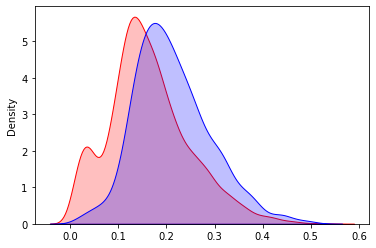

In [102]:
# Common Support Region
plot_non_treated = sns.kdeplot(non_treated, shade=True, color='r')
plot_treated = sns.kdeplot(treated, shade=True, color='b')

# Matching

In [103]:
# Matching Model
model = CausalModel(Y,
                    treat,
                    confounders)
model.est_via_matching(bias_adj=True)
print(model.estimates)

/usr/local/lib/python3.7/dist-packages/causalinference/estimators/matching.py:100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(X, Y)[0][1:]  # don't need intercept coef



Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE     -0.149      0.063     -2.372      0.018     -0.272     -0.026
           ATC     -0.143      0.070     -2.056      0.040     -0.279     -0.007
           ATT     -0.179      0.060     -2.990      0.003     -0.296     -0.062



# Robutness: Repeated experiments

In [104]:
# prepare for the loop
ate = {}
# start the loop
i = 0
while i < 1000:
  # sample
  sample = df.sample(1000)
  # Matching preparation
  treat = sample.catholic.values
  Y = sample.score_standardized.values
  confounders = sample.drop(["catholic", "score_standardized"], axis=1).values
  # Matching
  model = CausalModel(Y, treat, confounders)
  model.est_via_matching(bias_adj=True)
  # store the results
  ate[i] = model.estimates["matching"]["ate"]
  i += 1

AxesSubplot(0.125,0.125;0.775x0.755)
-0.12586093283523145


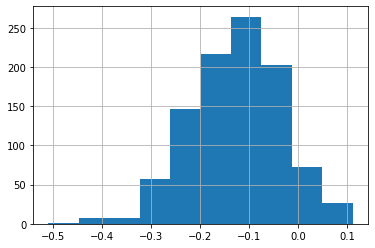

In [105]:
# Visualization
ate = pd.Series(ate)
print(ate.hist())
print(ate.mean())

# Robutness Check - Removing 1 confounder

In [106]:
# New confounder list
confounder = df.drop(["catholic", "score_standardized", "income"], axis=1).values

In [109]:
# Matching
model = CausalModel(Y,
                    treat,
                    confounders)
model.est_via_matching(bias_adj=True)
print(model.estimates)


Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE     -0.163      0.127     -1.282      0.200     -0.411      0.086
           ATC     -0.175      0.140     -1.254      0.210     -0.450      0.099
           ATT     -0.110      0.131     -0.839      0.401     -0.366      0.147



/usr/local/lib/python3.7/dist-packages/causalinference/estimators/matching.py:100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(X, Y)[0][1:]  # don't need intercept coef
